# Case Web Motors

### Contexto:
* A Webmotors dispõe de diversos produtos digitais para solucionar problemas durante a compra, utilização e venda de um veículo, sendo um de seus principais e mais conhecidos o classificado. Para o classificado utilizamos o lead model para monetizar nosso produto. Um lead é uma demonstração de interesse de um comprador para um vendedor.

### Definições:
> Lead: Demonstração de interesse de um comprador por um produto de algum vendedor  
>Dados: 0 -> Não; 1 -> Sim

### Tarefa:
* Determine ao menos uma alternativa para potencializar o recebimento de leads dos anúncios.

### Parte1: 
Exploração dos Dados buscando a correlação dos leads com as outras variáveis

### Parte 2:
Desenvolver um modelo para de determinar se um anúncio receberá lead  
Que outras informações, as quais você não teve acesso, poderiam ajudar a chegar a conclusões melhores?

### Parte 3 (Bônus!!!)
Proponha um modelo para determinar a quantidade de leads que um anúncio irá receber

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

pd.set_option('max_columns', None)

In [2]:
print(os.getcwd())

c:\FCD\Case-GCBInvestimentos


In [3]:
# Dicionária do que significa as colunas no dataset
dicionario = pd.read_csv('Case 1 - dicionario.csv')
dicionario

,attribute,description
0,cod_anuncio,código do anúncio
1,cod_cliente,código do anunciante
2,cod_tipo_pessoa,"tipo de anunciante: PF=1, PJ=2"
3,prioridade,"prioridade do anúncio (1=alta, 2-média, 3-baixa)"
4,leads,tota de propostas recebidas
5,views,quantidade de visualizações no anúncio
6,cliques_telefone,quantidade de cliques no telefone anunciado
7,cod_marca_veiculo,código da marca do veículo
8,cod_modelo_veiculo,código do modelo veículo
9,cod_versao_veiculo,código da versão do veículo


In [4]:
df = pd.read_csv('Case 1 - dados.csv')
df.head()

,cod_anuncio,cod_cliente,cod_tipo_pessoa,prioridade,leads,views,cliques_telefone*,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,cep_2dig,uf_cidade,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,combustivel,cambio,portas,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
0,2,7941,2,3,1,0,0,34,769,346932,2018,75,GO_Itumbiara,110990.0,7,0,NaN,0,0,0.0,0.0,0,0.0,0,0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6,1770,1,3,1,0,4,2,704,340148,1996,6,SP_Osasco,8300.0,0,689815,NaN,0,0,0.0,0.0,0,0.0,0,0,0.0,alcool,manual,2.0,S,NaN,S,N,N,S,N,S,S,N,N,N
2,8,709,1,3,4,0,11,30,1071,310713,2002,2,SP_SÃ£o Paulo,38800.0,4,33700,NaN,0,0,0.0,0.0,0,0.0,0,0,0.0,gasolina,manual,4.0,S,NaN,S,N,S,S,S,S,S,S,N,N
3,13,9708,1,2,12,0,14,10,2028,341195,1995,4,SP_SÃ£o Paulo,44000.0,8,105000,NaN,0,1,1.0,0.0,0,0.0,0,0,0.0,gasolina,automatico,2.0,N,S,S,S,S,N,N,S,S,S,N,N
4,15,1363,1,2,8,0,11,12,805,332063,1995,5,SP_SÃ£o Paulo,30000.0,6,71240,NaN,0,0,0.0,0.0,0,0.0,0,0,0.0,gasolina,automatico,4.0,S,N,S,S,S,S,S,S,S,S,N,N


# Limpeza e Tratamento de Dados

In [5]:
# Temos 48665 registros e 41 colunas
df.shape

(48665, 41)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48665 entries, 0 to 48664
Data columns (total 41 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   cod_anuncio                        48665 non-null  int64  
 1   cod_cliente                        48665 non-null  int64  
 2   cod_tipo_pessoa                    48665 non-null  int64  
 3   prioridade                         48665 non-null  int64  
 4   leads                              48665 non-null  int64  
 5   views                              48665 non-null  int64  
 6   cliques_telefone*                  48665 non-null  int64  
 7   cod_marca_veiculo                  48665 non-null  int64  
 8   cod_modelo_veiculo                 48665 non-null  int64  
 9   cod_versao_veiculo                 48665 non-null  int64  
 10  ano_modelo                         48665 non-null  int64  
 11  cep_2dig                           48665 non-null  int

In [7]:
# Criando uma lista com os nomes das colunas do tipo 'object'
obj_list = df.select_dtypes(include = ['object']).columns.to_list()
obj_list

['uf_cidade',
 'combustivel',
 'cambio',
 'alarme',
 'airbag',
 'arquente',
 'bancocouro',
 'arcondic',
 'abs',
 'desembtras',
 'travaeletr',
 'vidroseletr',
 'rodasliga',
 'sensorchuva',
 'sensorestacion']

In [8]:
df.dtypes.value_counts()

int64      19
object     15
float64     7
dtype: int64

### Valores NA

In [9]:
# Verificação de valores missing
df.isna().sum()

cod_anuncio                             0
cod_cliente                             0
cod_tipo_pessoa                         0
prioridade                              0
leads                                   0
views                                   0
cliques_telefone*                       0
cod_marca_veiculo                       0
cod_modelo_veiculo                      0
cod_versao_veiculo                      0
ano_modelo                              0
cep_2dig                                0
uf_cidade                               0
vlr_anuncio                             0
qtd_fotos                               0
km_veiculo                              0
vlr_mercado                          6217
flg_unico_dono                          0
flg_licenciado                          0
flg_ipva_pago                         312
flg_todas_revisoes_concessionaria     312
flg_todas_revisoes_agenda_veiculo       0
flg_garantia_fabrica                  312
flg_blindado                      

In [10]:
# Vamos remover registros que tenham os valores missings
df = df.dropna(axis = 0).reset_index(drop = True)

In [11]:
df.shape

(42157, 41)

In [12]:
df.isna().sum()

cod_anuncio                          0
cod_cliente                          0
cod_tipo_pessoa                      0
prioridade                           0
leads                                0
views                                0
cliques_telefone*                    0
cod_marca_veiculo                    0
cod_modelo_veiculo                   0
cod_versao_veiculo                   0
ano_modelo                           0
cep_2dig                             0
uf_cidade                            0
vlr_anuncio                          0
qtd_fotos                            0
km_veiculo                           0
vlr_mercado                          0
flg_unico_dono                       0
flg_licenciado                       0
flg_ipva_pago                        0
flg_todas_revisoes_concessionaria    0
flg_todas_revisoes_agenda_veiculo    0
flg_garantia_fabrica                 0
flg_blindado                         0
flg_aceita_troca                     0
flg_adaptado_pcd         

In [13]:
# Ainda temos um data cerca de 87% do nosso dataset original
len(df)/48665

0.8662693927874242

### Valores duplicados

In [14]:
# Verificação de valores duplicados
df.duplicated().sum()

0

* Não há valores duplicados

### Valores Inconsistentes

In [15]:
# Iremos remover registros onde o número de 'views' sejam menor que o número de 'leads', pois esta informação não faz sentido.
# Temos diversos registros onde houve 0 'views' e obtivemos um número, as vezes até relativamente altos, de 'leads'.
index_to_drop = df[(df.views < df.leads)].index

In [16]:
df.drop(df.index[(index_to_drop)], inplace = True)

In [17]:
df.shape

(41322, 41)

# Análise Exploratória dos Dados

In [18]:
# Describe das variáveis 'numéricas'
df.describe()

,cod_anuncio,cod_cliente,cod_tipo_pessoa,prioridade,leads,views,cliques_telefone*,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,cep_2dig,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,portas
count,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,4.132200e+04,41322.000000,4.132200e+04,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000,41322.000000
mean,102310.673661,8271.707420,1.882411,2.614781,3.600261,418.666473,6.569963,18.643023,2072.048110,343161.451817,2013.517037,38.873554,8.574010e+04,6.681138,2.126215e+05,52595.959593,0.212574,0.299380,0.400610,0.148105,0.060500,0.069576,0.017013,0.070955,0.000387,3.780214
std,54226.380544,7442.557866,0.322124,0.760240,8.712076,604.503062,8.842611,36.442259,1110.922968,8338.140697,3.473578,33.614237,1.570972e+06,2.137584,1.421112e+07,41158.547585,0.409134,0.457992,0.490028,0.355208,0.238415,0.254433,0.129320,0.256753,0.019674,0.734626
min,95.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,2.000000,650.000000,1429.000000,1951.000000,1.000000,4.900000e+03,0.000000,0.000000e+00,6292.843540,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,56357.000000,3563.000000,2.000000,3.000000,1.000000,88.000000,2.000000,4.000000,788.000000,342655.000000,2012.000000,9.000000,3.090000e+04,6.000000,3.400000e+04,31366.764470,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,102994.500000,6504.000000,2.000000,3.000000,1.000000,212.000000,4.000000,5.000000,2487.000000,344131.000000,2014.000000,22.000000,3.999000e+04,8.000000,5.926450e+04,40607.151760,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
75%,149444.250000,10018.250000,2.000000,3.000000,4.000000,472.000000,8.000000,26.000000,3202.000000,345486.000000,2016.000000,78.000000,6.089000e+04,8.000000,8.953100e+04,61358.535275,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
max,194701.000000,38724.000000,2.000000,3.000000,348.000000,4872.000000,205.000000,304.000000,3676.000000,347728.000000,2019.000000,99.000000,1.220000e+08,20.000000,2.147484e+09,921239.188800,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000


As colunas 'cod_marca_veiculo', 'cod_modelo_veiculo' e 'cod_versao_veiculo' são inconclusivas, visto que estão dadas em códigos.  
Seria interessante se tivessemos acesso ao que significam para melhor análise dos dados

> A grande maioria dos anuncios possuem lead baixos, cerca de 75% deles estão com até 3 leads

In [19]:
df[['cod_marca_veiculo','cod_modelo_veiculo','cod_marca_veiculo']].nunique()

cod_marca_veiculo      44
cod_modelo_veiculo    428
cod_marca_veiculo      44
dtype: int64

In [20]:
# Quase da metade dos anúncios possuem apenas 1 lead
df.leads.value_counts().head(8)

1     20638
0      9286
4      5439
8      2276
12     1198
16      725
20      449
24      319
Name: leads, dtype: int64

In [21]:
# Vamos considerar outliers, registros com valores de zscore maior que três

qtd = []
zscore = stats.zscore(df.leads)
for i in zscore:
    if i > 3:
        qtd.append(i)
print(len(qtd))

# Temos 766 registros considaderados como outliers na coluna leads

766


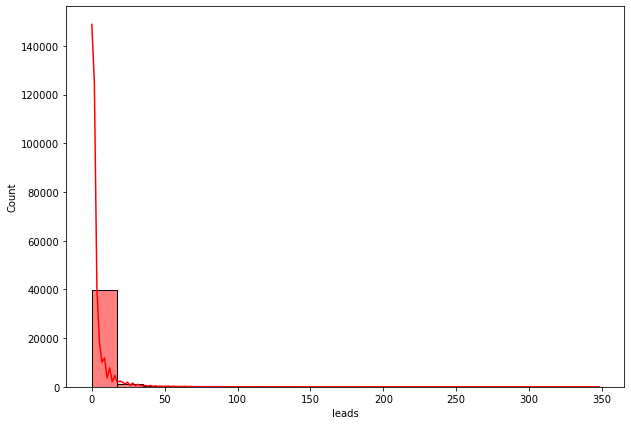

In [22]:
# Visualização da distribuição dos leads
plt.figure(figsize = (10,7))

sns.histplot(data = df, x = df.leads, bins = 20, color = 'r', kde = True)

A grande maioria dos anuncios possuem lead baixos, cerca de 75% deles estão com até 3 leads

In [23]:
# Describe das variáveis 'categóricas'
df[obj_list].describe()

,uf_cidade,combustivel,cambio,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
count,41322,41322,41322,41322,41322,41322,41322,41322,41322,41322,41322,41322,41322,41322,41322
unique,844,10,7,2,2,2,2,2,2,2,2,2,2,2,2
top,SP_SÃ£o Paulo,gasolina e alcool,manual,S,S,S,N,S,S,S,S,S,S,N,N
freq,7136,31650,23415,25751,28219,26243,28115,35562,26406,26278,35476,35188,22739,38106,29904


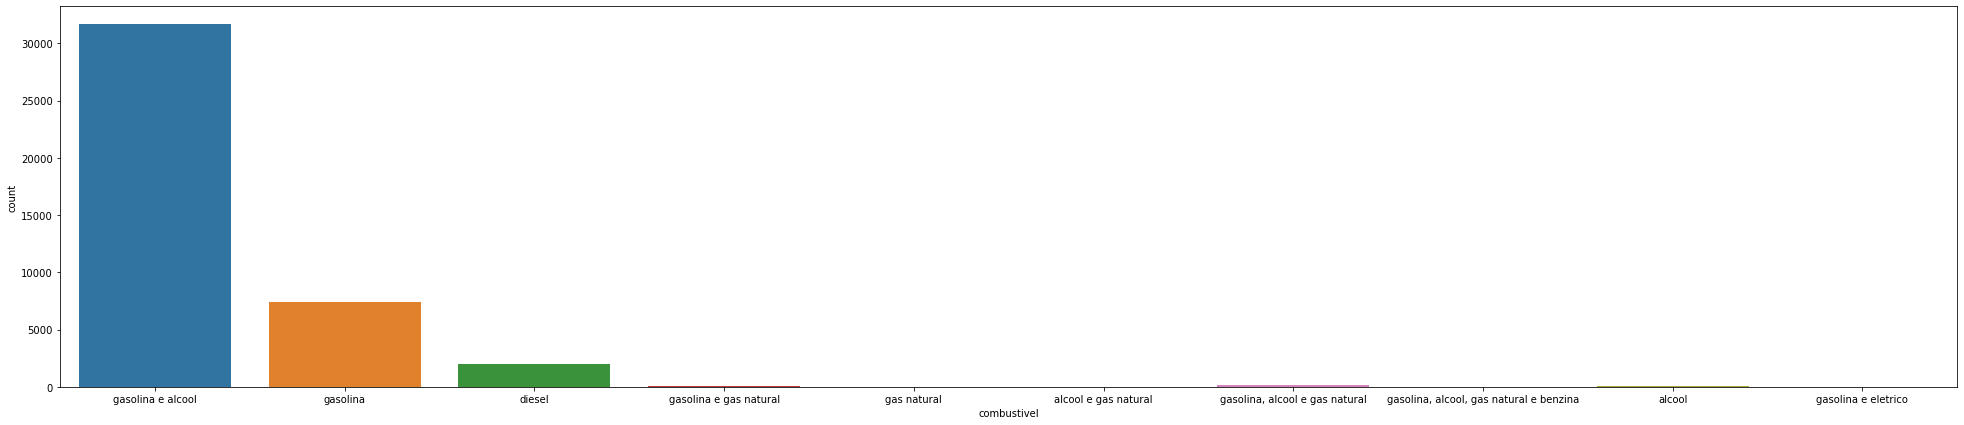

In [24]:
plt.figure(figsize = (34,7))

sns.countplot(x = df.combustivel)

A maior parte dos carros são flex, seguidos por abastecimento a gasolina e diesel

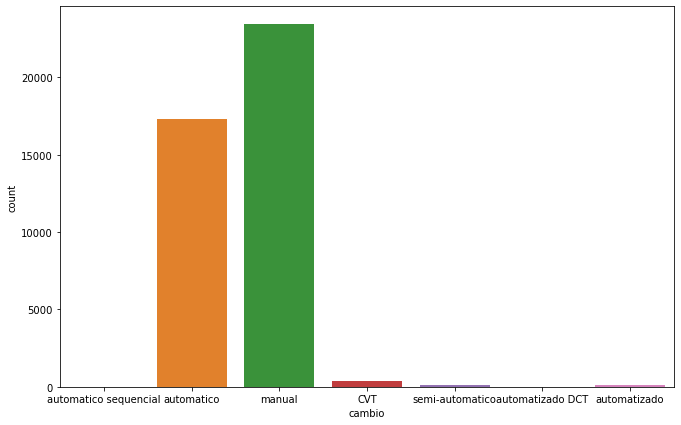

In [25]:
plt.figure(figsize = (11,7))

sns.countplot(x = df.cambio)

As duas categorias de cambio que mais aparecerem são primeiramente o Manual e logo em seguida o automático

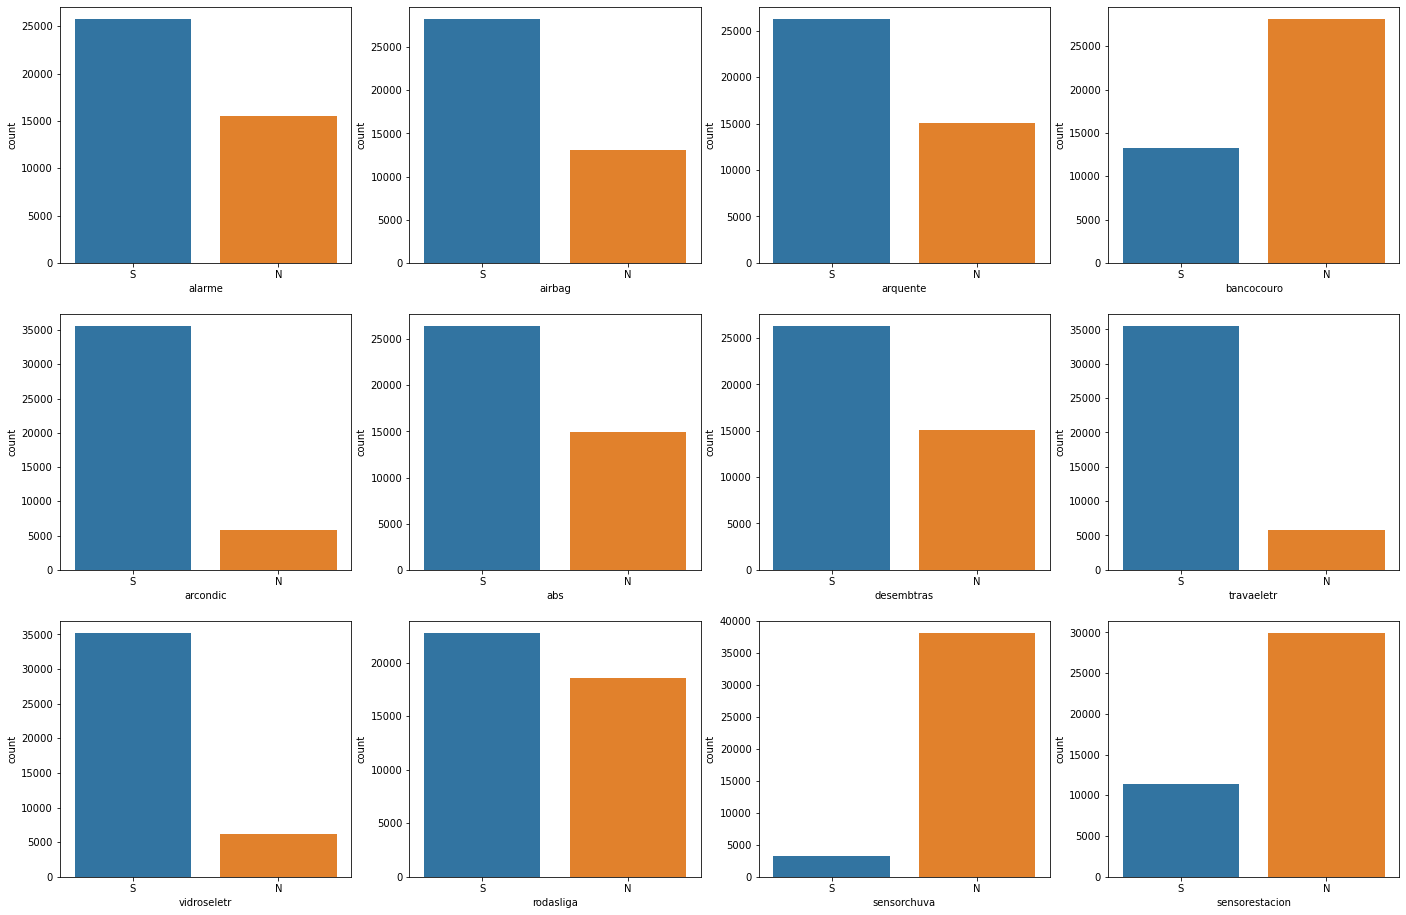

In [26]:
plt.figure(figsize = (24,16))

for i in range(3, len(obj_list)):
    plt.subplot(3,4, i+1-3)

    sns.countplot(data = df, x = df[obj_list[i]])

In [27]:
# Criando um copia do df original para usarmos na exploração de dados
df_eda = df.copy()

# Quais Variáveis mais afetam os leads

In [42]:
df[['cod_marca_veiculo','cod_modelo_veiculo','cod_marca_veiculo']].nunique()

cod_marca_veiculo      44
cod_modelo_veiculo    428
cod_marca_veiculo      44
dtype: int64

In [34]:
df.head()

,cod_anuncio,cod_cliente,cod_tipo_pessoa,prioridade,leads,views,cliques_telefone*,cod_marca_veiculo,cod_modelo_veiculo,cod_versao_veiculo,ano_modelo,cep_2dig,uf_cidade,vlr_anuncio,qtd_fotos,km_veiculo,vlr_mercado,flg_unico_dono,flg_licenciado,flg_ipva_pago,flg_todas_revisoes_concessionaria,flg_todas_revisoes_agenda_veiculo,flg_garantia_fabrica,flg_blindado,flg_aceita_troca,flg_adaptado_pcd,combustivel,cambio,portas,alarme,airbag,arquente,bancocouro,arcondic,abs,desembtras,travaeletr,vidroseletr,rodasliga,sensorchuva,sensorestacion
0,95,16462,1,1,0,0,6,12,2722,342061,2010,8,SP_PoÃ¡,31900.0,8,74000,26875.00573,1,1,1.0,1.0,0,1.0,0,1,0.0,gasolina e alcool,automatico sequencial,4.0,S,S,S,S,S,S,S,S,S,S,S,S
1,110,1987,1,1,0,0,2,2,1161,339241,2009,1,SP_SÃ£o Paulo,25500.0,8,128000,23779.45322,0,1,1.0,0.0,0,0.0,0,1,0.0,gasolina e alcool,automatico,4.0,S,S,S,N,S,S,S,S,S,N,N,N
2,117,18367,1,1,0,0,10,3,687,344077,2010,9,SP_SÃ£o Bernardo do Campo,23990.0,6,60000,22428.12461,1,1,1.0,0.0,0,0.0,0,1,0.0,gasolina e alcool,manual,4.0,N,N,S,N,S,N,S,S,S,S,N,N
3,200,16006,1,1,0,0,13,2,2950,342268,2012,12,SP_SÃ£o JosÃ© dos Campos,44000.0,5,140000,45785.57787,1,1,1.0,1.0,1,1.0,0,0,0.0,gasolina,automatico,4.0,S,S,S,S,S,S,S,S,S,S,N,N
4,303,80,1,3,0,0,8,3,1146,339886,2008,9,SP_SÃ£o Bernardo do Campo,18800.0,7,155000,20273.00157,0,1,1.0,0.0,0,0.0,0,0,0.0,gasolina e alcool,manual,4.0,S,N,S,N,S,N,S,S,S,N,N,N


In [32]:
df.reset_index(drop = True, inplace = True)

## Relação Leads x cliques_telefone

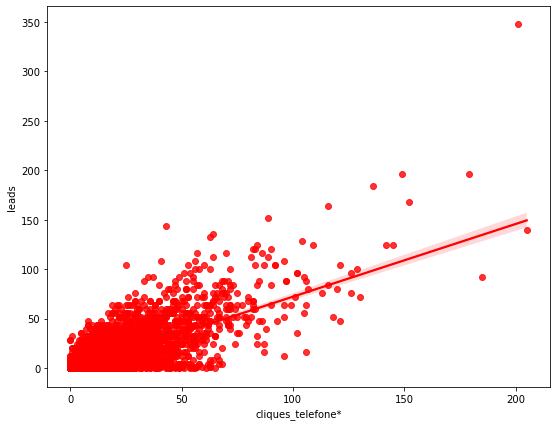

In [39]:
plt.figure(figsize=(9,7))

sns.regplot(data = df, x = 'cliques_telefone*', y = 'leads', color = 'r');

Podemos notar uma relação positiva do numero de cliques no telefone com o numero de 'leads'.  
Também é possível verificar a presença de alguns outliers